# Retail Customer Segmentation
Congratulations! You just got some contract work with a Retail company based in Seattle that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company would like to know if they can segment their customers in groups with different spending habits.

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas __Email__, __Address__, and their color __Avatar__. Then it also has numerical value columns:

* __Avg. Session Length__: Average session of in-store style advice sessions.
* __Time on App__: Average time spent on App in minutes
* __Time on Website__: Average time spent on Website in minutes
* __Length of Membership__: How many years the customer has been a member. 

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

# Get the Data

In [4]:
customers = pd.read_csv('Ecommerce Customers')

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
customers_original = customers.copy()

# Variable Information

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Check Missing or Duplicated Data

<AxesSubplot:>

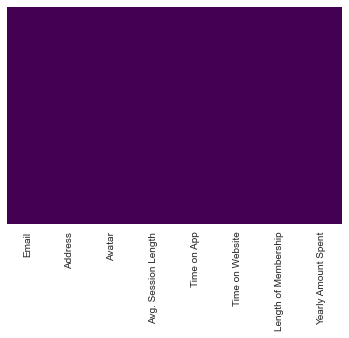

In [8]:
sns.heatmap(data = customers.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

* No missing data

In [9]:
customers.duplicated().value_counts()

False    500
dtype: int64

* No duplicated data

# Exploratory Data Analysis - EDA

## Response Variable - Yearly Amount Spent

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

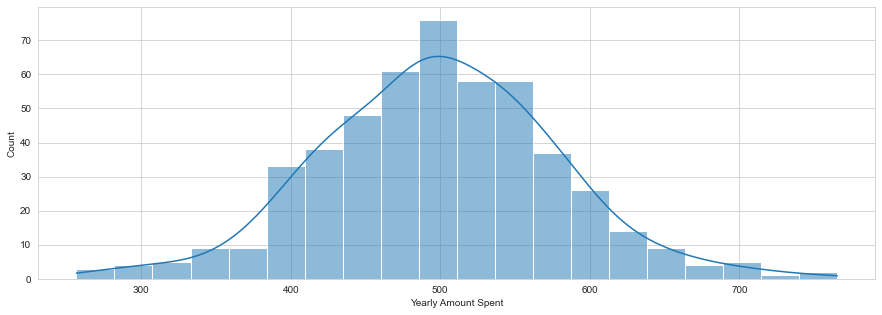

In [11]:
plt.figure(figsize=(15,5))
sns.histplot(data = customers['Yearly Amount Spent'], kde = True)

In [20]:
spent_mean = round(customers['Yearly Amount Spent'].mean(),2)
spent_median = round(customers['Yearly Amount Spent'].median(),2)
spent_std = round(customers['Yearly Amount Spent'].std(),2)
print(f'Yearly Amount Spent mean: {spent_mean}')
print(f'Yearly Amount Spent median: {spent_median}')
print(f'Yearly Amount Spent standard deviation: {spent_std}')
print(f'95% of Yearly Amount Spent between {spent_mean - (2 * spent_std)} and {round(spent_mean + (2 * spent_std),2)}')

Yearly Amount Spent mean: 499.31
Yearly Amount Spent median: 498.89
Yearly Amount Spent standard deviation: 79.31
95% of Yearly Amount Spent between 340.69 and 657.93


## Email

In [11]:
customers['Email'].value_counts()

mstephenson@fernandez.com        1
elizabeth61@berg-braun.com       1
pamelahampton@martin-cobb.com    1
dbell@hotmail.com                1
vancealicia@hotmail.com          1
                                ..
stevenking@patterson.com         1
blevinseric@stephens.com         1
campbellross@yahoo.com           1
casey21@johnson.com              1
hannahwilson@davidson.com        1
Name: Email, Length: 500, dtype: int64

* Varible will need feature engineering to generate insights

In [12]:
customers.drop('Email', axis = 1, inplace = True)

## Address

In [13]:
customers['Address'].value_counts()

835 Frank Tunnel\nWrightmouth, MI 82180-9605                      1
649 King Extension\nNorth April, NY 54175                         1
91542 Jessica Springs Suite 255\nThomashaven, MT 39239-3790       1
3485 Anthony Street Apt. 119\nMikeberg, FL 32602                  1
06307 Scott Spurs Suite 161\nJessicaburgh, NH 26093-5908          1
                                                                 ..
94730 Martin Mount\nNew Matthew, VI 08142-6708                    1
PSC 3676, Box 1549\nAPO AE 26130-7683                             1
6218 Michael Station Apt. 982\nSalazarburgh, NJ 79955             1
691 Johnson Field Apt. 510\nMichaelville, VI 78140                1
49791 Rachel Heights Apt. 898\nEast Drewborough, OR 55919-9528    1
Name: Address, Length: 500, dtype: int64

* Varible will need feature engineering to generate insights

In [14]:
customers.drop('Address', axis = 1, inplace = True)

## Avatar

In [15]:
customers['Avatar'].value_counts()

SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64

* Varible will need feature engineering to generate insights

In [16]:
customers.drop('Avatar', axis = 1 , inplace = True)

## Variable Correlation

<AxesSubplot:>

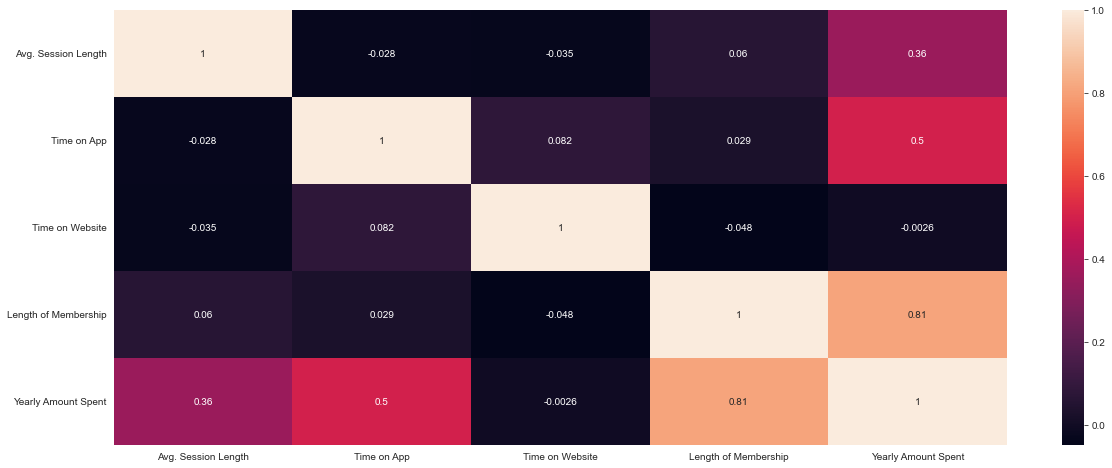

In [17]:
plt.figure(figsize=(20,8))
sns.heatmap(data = customers.corr(), annot = True)

# Normalizing Variables

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(customers)

MinMaxScaler()

In [21]:
scaled_features = scaler.transform(customers)

In [22]:
customers_feat = pd.DataFrame(data = scaled_features, columns = customers.columns)

In [23]:
customers_feat.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0.751425,0.626620,0.929816,0.573101,0.651040
1,0.362306,0.393016,0.550801,0.359869,0.266355
2,0.524953,0.426378,0.524803,0.576396,0.453725
3,0.722409,0.787050,0.460890,0.428434,0.639055
4,0.574861,0.647702,0.594748,0.627768,0.673552


# Training the Model

In [24]:
from sklearn.cluster import KMeans

## Clusters = 2

In [25]:
model = KMeans(n_clusters = 2)

In [26]:
model.fit(customers_feat)

KMeans(n_clusters=2)

In [27]:
model.cluster_centers_

array([[0.48554782, 0.49070505, 0.51249833, 0.39937115, 0.36372312],
       [0.58708718, 0.58681399, 0.52123497, 0.59504527, 0.6064819 ]])

In [28]:
model.labels_

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,

In [29]:
model.inertia_

45.095932298288936

## Apply Elbow Method por Optimal Number of Clusters

In [30]:
inert = []
for i in range(1, 11):
    model = KMeans(n_clusters = i)
    model.fit(customers_feat)
    inert.append(model.inertia_)

C:\Users\breno\anaconda3\envs\dsdegree\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


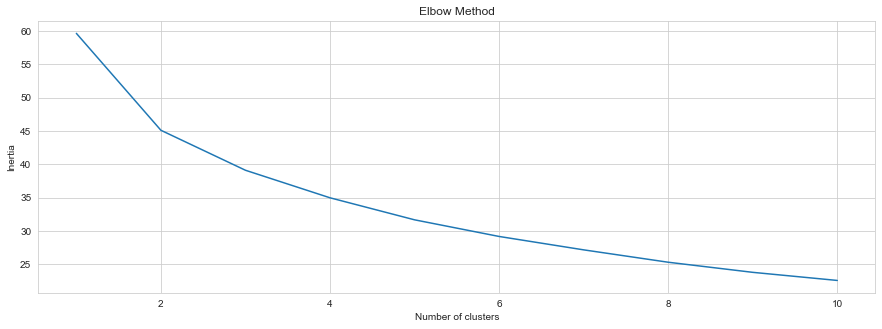

In [31]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), inert)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
inert

[59.63385727302952,
 45.095932298288936,
 39.0995584028509,
 34.969251512456395,
 31.66597497523736,
 29.17029073563175,
 27.161157148270533,
 25.30444614436224,
 23.789169050982437,
 22.572786857447998]

## Visualizing the Clusters

In [33]:
model = KMeans(n_clusters = 2)

In [34]:
customers_feat['Cluster'] = model.fit_predict(customers_feat)
customers_feat['Cluster'] = customers_feat['Cluster'].astype('category')

In [35]:
customers_feat.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Cluster
0,0.751425,0.626620,0.929816,0.573101,0.651040,0
1,0.362306,0.393016,0.550801,0.359869,0.266355,1
2,0.524953,0.426378,0.524803,0.576396,0.453725,1
3,0.722409,0.787050,0.460890,0.428434,0.639055,0
4,0.574861,0.647702,0.594748,0.627768,0.673552,0


## Clusters by Features

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Cluster'>

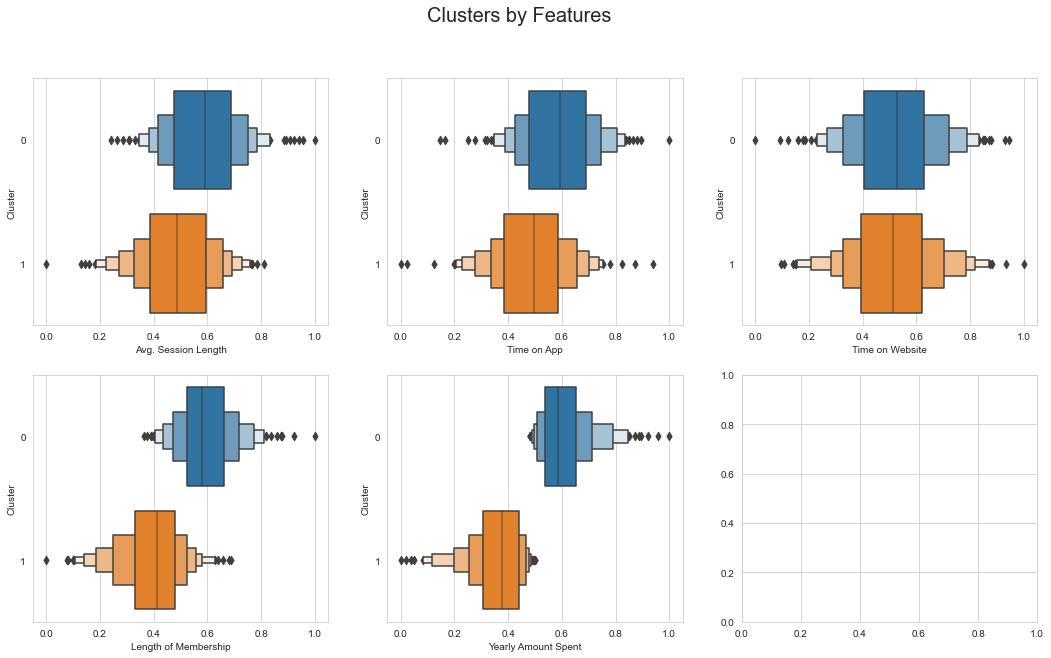

In [59]:
fig, axes = plt.subplots(2,3, figsize = (18,10))

fig.suptitle('Clusters by Features', fontsize = 20)

sns.boxenplot(data = customers_feat,
            x = 'Avg. Session Length',
            y = 'Cluster',
            ax = axes[0,0])

sns.boxenplot(data = customers_feat,
            x = 'Time on App',
            y = 'Cluster',
            ax = axes[0,1])

sns.boxenplot(data = customers_feat,
            x = 'Time on Website',
            y = 'Cluster',
            ax = axes[0,2])

sns.boxenplot(data = customers_feat,
            x = 'Length of Membership',
            y = 'Cluster',
            ax = axes[1,0])

sns.boxenplot(data = customers_feat,
            x = 'Yearly Amount Spent',
            y = 'Cluster',
            ax = axes[1,1])

## Yearly Amount Spent vs Cluster

Text(0.5, 1.0, 'Yearly Amount Spent vs Cluster')

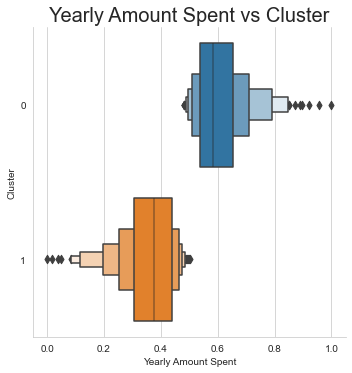

In [42]:
sns.catplot(data = customers_feat,
            x = 'Yearly Amount Spent',
            y = 'Cluster',
            kind = 'boxen')
plt.title('Yearly Amount Spent vs Cluster', fontsize = 20)

## Time on App vs Cluster

Text(0.5, 1.0, 'Time on App vs Cluster')

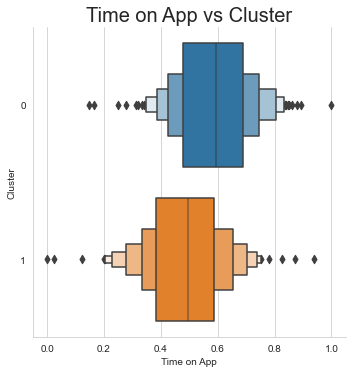

In [45]:
sns.catplot(data = customers_feat,
            x = 'Time on App',
            y = 'Cluster',
            kind = 'boxen')
plt.title('Time on App vs Cluster', fontsize = 20)

## Time on Website vs Cluster

Text(0.5, 1.0, 'Time on Website vs Cluster')

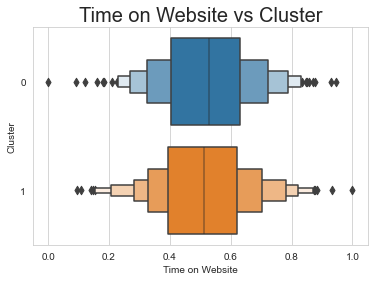

In [54]:
sns.boxenplot(data = customers_feat,
            x = 'Time on Website',
            y = 'Cluster'
             )
plt.title('Time on Website vs Cluster', fontsize = 20)

## Conclusions 💯
* The data __indicates__ that the company could develop different strategies for __customer targeting__ based on __Yearly Amount Spent__, such as:
 
 1) Focus on customers who spend __less__:  
    
    1.1) __Free shipping__  
    1.2) __Progressive discounts__  
    1.3) __Increase payment options__  
 
 2) Focus on customers who spend __more__:
 
    2.1) __Offer similar products through email marketing__  
    2.2) __Offer in-cart complementary products__ (E.g: customer adds a shirt, receives recommendation for a pair of pants)  
    2.3) __Develop Loyalty Program to maintain/increase high value customers' engagement__